In [110]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc,confusion_matrix
from pgmpy.models import BayesianNetwork

#reads datas from the files and stores it
X_train = pd.read_csv(r'C:\Users\15623\Desktop\jupy\weatherAUS_X_train.csv', header=0,delimiter = ',',encoding = 'latin-1')
X_test = pd.read_csv(r'C:\Users\15623\Desktop\jupy\weatherAUS_X_test.csv',header=0,delimiter = ',',encoding = 'latin-1')
y_train = pd.read_csv(r'C:\Users\15623\Desktop\jupy\weatherAUS_y_train.csv', header=0,delimiter = ',',encoding = 'latin-1')
y_test = pd.read_csv(r'C:\Users\15623\Desktop\jupy\weatherAUS_y_test.csv', header=0,delimiter = ',',encoding = 'latin-1')
column_names = X_train.columns.tolist()

#print top rows of X_train and X_test data
print("X_train Data: ")
print(X_train.head())
print("X_test Data: ")
print(X_test.head())

#drops first two columns as they are not numerical value and irrelevant
X_train.drop(X_train.columns[:2], axis=1, inplace=True)
X_test.drop(X_test.columns[:2], axis=1, inplace=True)

#drop columns that are not numerical values and wind directions are not as important as other factors
X_train.drop(columns=['WindGustDir','WindDir9am','WindDir3pm'], axis = 1,inplace=True)
X_test.drop(columns=['WindGustDir','WindDir9am','WindDir3pm'], axis = 1,inplace=True)

#get list of column names
column_names = X_train.columns.tolist()



X_train Data: 
         Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  2017-04-24            Albany     14.5     17.8      14.2          NaN   
1  2013-10-11         Katherine     24.6     39.5       0.0         12.0   
2  2012-02-18  MelbourneAirport     14.7     26.6       0.2          3.2   
3  2012-02-18       Williamtown     18.3     26.6       0.0          NaN   
4  2011-10-11          Adelaide     11.4     19.3       0.6          2.4   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  \
0       NaN         NaN            NaN        NaN  ...          NaN   
1       NaN          SE           31.0          N  ...         17.0   
2       8.0         SSE           30.0         SW  ...         11.0   
3       NaN          SE           28.0        WSW  ...         22.0   
4       8.9           W           31.0         SW  ...         19.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         94.0          

In [111]:

#drops any rows that contain missing values in Rain today or rain tomorrow because they are useless without it.
#after deleting, delete the row in corresoponding row in other data.
X_train.dropna(subset=['RainToday'], inplace=True)
y_train = y_train[y_train.index.isin(X_train.index)]

X_test.dropna(subset=['RainToday'], inplace=True)
y_test = y_test[y_test.index.isin(X_test.index)]

y_train.dropna(subset=['RainTomorrow'], inplace=True)
X_train = X_train[X_train.index.isin(y_train.index)]

y_test.dropna(subset=['RainTomorrow'], inplace=True)
X_test = X_test[X_test.index.isin(y_test.index)]


#replace non-numerical value, Yes > 1 No to > 0
X_train['RainToday'] = X_train['RainToday'].replace({'No': 0, 'Yes': 1})
X_test['RainToday'] = X_test['RainToday'].replace({'No': 0, 'Yes': 1})
print("After pre-processing: ")
print("X_train Data: ")
print(X_train.head())
print("X_test Data: ")
print(X_test.head())


After pre-processing: 
X_train Data: 
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     14.5     17.8      14.2          NaN       NaN            NaN   
1     24.6     39.5       0.0         12.0       NaN           31.0   
2     14.7     26.6       0.2          3.2       8.0           30.0   
3     18.3     26.6       0.0          NaN       NaN           28.0   
4     11.4     19.3       0.6          2.4       8.9           31.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.0           NaN         94.0          NaN       1024.1   
1           9.0          17.0         52.0         21.0       1011.8   
2           7.0          11.0         87.0         57.0       1018.2   
3          11.0          22.0         79.0         67.0       1017.0   
4          13.0          19.0         63.0         47.0       1018.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
0       1022.5       8.0       NaN  

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


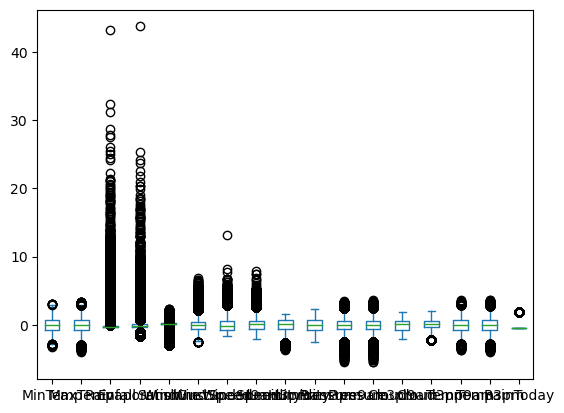

In [112]:
#Handling missing values and standardizing data, both X_train and X_test
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_test)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_imputed)
print(column_names)
df = pd.DataFrame(data=X_train_scaled,columns = column_names)
ax = df.plot.box()



In [113]:
#calculating correlation matrix
corr = df.corr()

# Visualize correlation matrix
corr.style.background_gradient(cmap='Spectral').format(precision=2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
MinTemp,1.00,0.74,0.10,0.37,0.03,0.17,0.17,0.17,-0.23,0.01,-0.42,-0.43,0.04,-0.00,0.90,0.70,0.06
MaxTemp,0.74,1.00,-0.07,0.45,0.31,0.07,0.02,0.05,-0.50,-0.50,-0.31,-0.40,-0.24,-0.22,0.88,0.97,-0.23
Rainfall,0.10,-0.07,1.00,-0.04,-0.17,0.13,0.09,0.06,0.22,0.25,-0.16,-0.12,0.17,0.14,0.01,-0.08,0.50
Evaporation,0.37,0.45,-0.04,1.00,0.28,0.15,0.15,0.10,-0.39,-0.30,-0.21,-0.23,-0.17,-0.16,0.43,0.44,-0.14
Sunshine,0.03,0.31,-0.17,0.28,1.00,-0.03,-0.01,0.02,-0.33,-0.43,0.04,-0.01,-0.51,-0.53,0.19,0.33,-0.24
WindGustSpeed,0.17,0.07,0.13,0.15,-0.03,1.00,0.58,0.66,-0.21,-0.03,-0.43,-0.39,0.04,0.07,0.15,0.03,0.15
WindSpeed9am,0.17,0.02,0.09,0.15,-0.01,0.58,1.00,0.51,-0.27,-0.03,-0.22,-0.17,0.00,0.03,0.13,0.01,0.10
WindSpeed3pm,0.17,0.05,0.06,0.10,0.02,0.66,0.51,1.00,-0.15,0.02,-0.28,-0.24,0.03,0.01,0.16,0.03,0.08
Humidity9am,-0.23,-0.50,0.22,-0.39,-0.33,-0.21,-0.27,-0.15,1.00,0.66,0.13,0.18,0.36,0.28,-0.47,-0.49,0.35
Humidity3pm,0.01,-0.50,0.25,-0.30,-0.43,-0.03,-0.03,0.02,0.66,1.00,-0.03,0.05,0.40,0.41,-0.22,-0.56,0.37


In [114]:
#Reducing demension with pca to train the classfication more effectively 

pca = PCA(n_components =9)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.fit_transform(X_test_scaled)


Decision Tree Train Accuracy : 0.9999556127657686
Decision Tree Test Accuracy : 0.7479567905621491


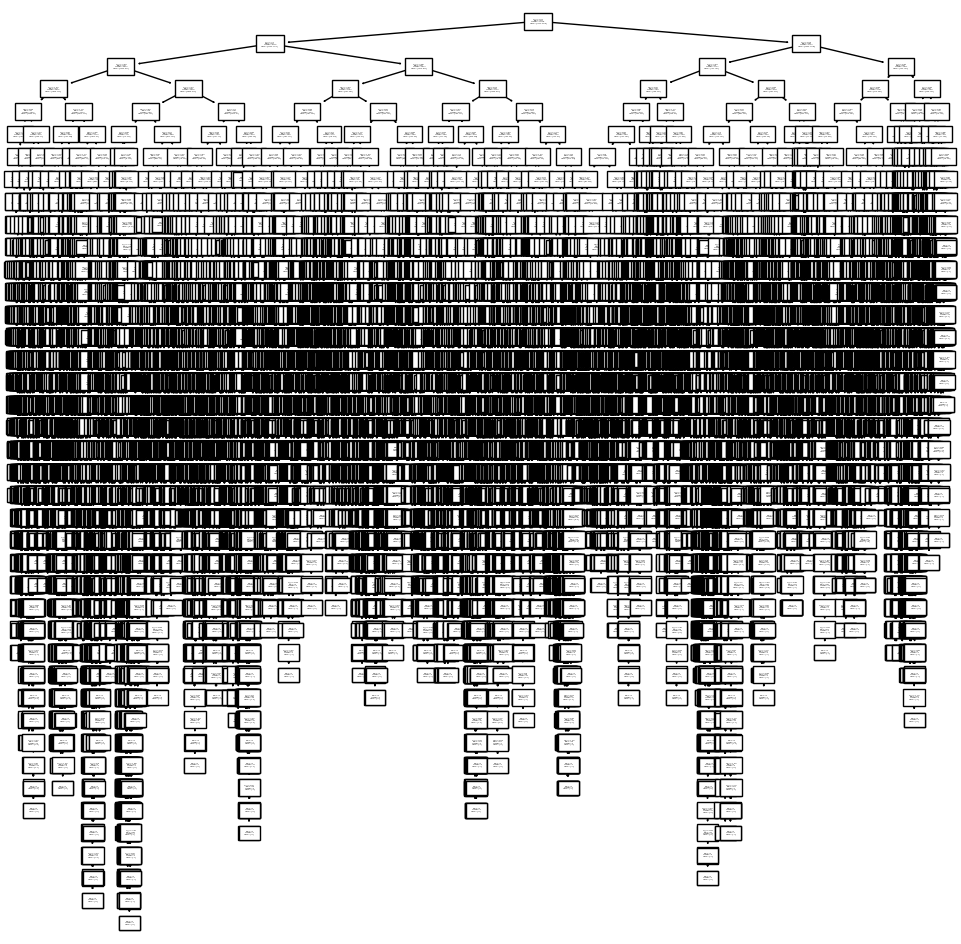

In [115]:
#training the data in default decision tree classfier to compare it to optimzed clf.
train = DecisionTreeClassifier()
train.fit(X_train_scaled,y_train)

predict = train.predict(X_train_scaled)

score = accuracy_score(y_train,predict)
print("Decision Tree Train Accuracy :", score)

predict = train.predict(X_test_scaled)
score = accuracy_score(y_test,predict)
print("Decision Tree Test Accuracy :", score)

#draw decision tree
plt.figure(figsize=(12,12))
plot_tree(train, fontsize=1)
plt.savefig('tree_high_dpi', dpi=100)
plt.show()

Classification report:                precision    recall  f1-score   support

          No       0.84      0.83      0.84     21866
         Yes       0.44      0.47      0.45      6276

    accuracy                           0.75     28142
   macro avg       0.64      0.65      0.64     28142
weighted avg       0.75      0.75      0.75     28142



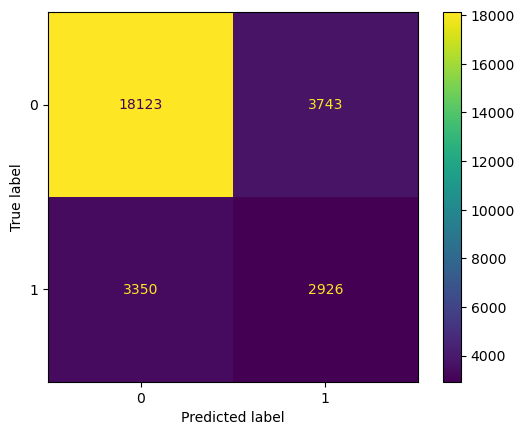

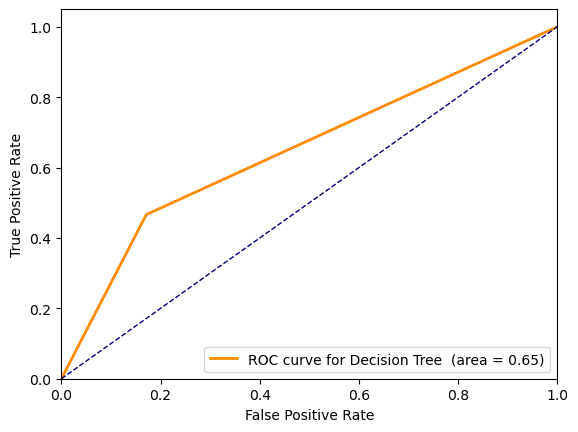

In [116]:
#classification report of Decision Tree

print("Classification report: ", classification_report(y_test,predict))

#printing confusion matrix of decision tree 
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

#printing ROC curve of the clf
y_score = train.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Decision Tree  (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [37]:

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None,5,8, 10, 15,20,40], 'min_samples_split': [1, 3, 5, 10], 'min_samples_leaf': [1, 2]}
tree = DecisionTreeClassifier()
half_Grid = HalvingGridSearchCV(tree,param_grid,n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)

print("Half Grid Best Param: ", half_Grid.best_params_)
print("Half Grid Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)
print("Best Model's Train Score:", train_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

Half Grid Best Param:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Half Grid Best Score: 0.8255351274535927
Best Model's Train Score: 0.8233601023381423
Best Model's Test Score: 0.8233601023381423


Classification report:                precision    recall  f1-score   support

          No       0.85      0.94      0.89     21866
         Yes       0.66      0.42      0.52      6276

    accuracy                           0.82     28142
   macro avg       0.76      0.68      0.70     28142
weighted avg       0.81      0.82      0.81     28142



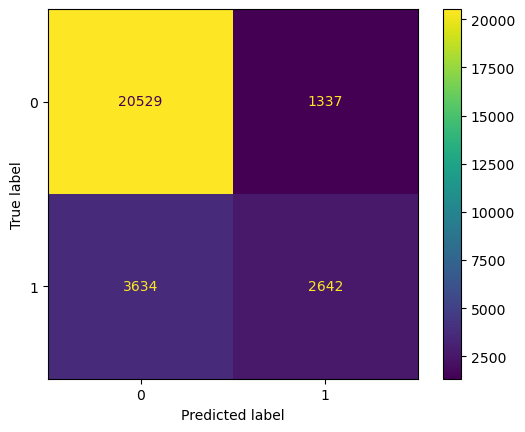

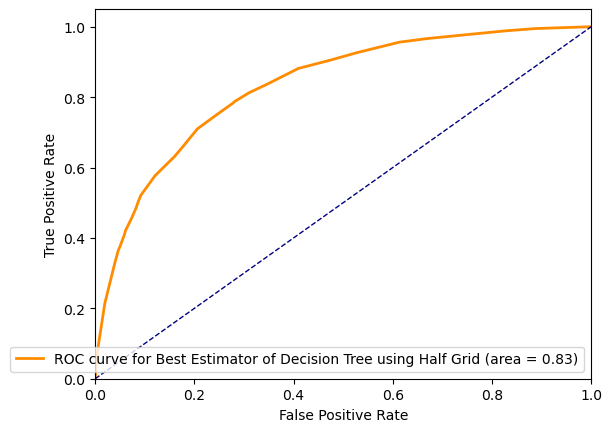

In [38]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator of Decision Tree using Half Grid (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
# clf = LinearSVC(random_state = 42, probability = True)#takes long time
clf = SVC(kernel = 'linear', probability=True)
clf.fit(X_train_scaled,y_train)
train_score = clf.score(X_train_scaled,y_train)*100
test_score = clf.score(X_test_scaled,y_test)*100
predict = clf.predict(X_test_scaled)
print("Linear SVM Train Score:", train_score)
print("Linear SVM Test Score:", test_score)
linear_svm_accuracy = accuracy_score(y_test,predict)*100
print("Linear SVM Accuracy:", linear_svm_accuracy)
# print(classification_report(y_test, predict))
# print(confusion_matrix(y_test,predict))


C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVM Train Score: 83.45599005725953
Linear SVM Test Score: 82.5030203965603
Linear SVM Accuracy: 82.5030203965603


Classification report:                precision    recall  f1-score   support

          No       0.84      0.96      0.89     21866
         Yes       0.71      0.36      0.48      6276

    accuracy                           0.83     28142
   macro avg       0.77      0.66      0.69     28142
weighted avg       0.81      0.83      0.80     28142



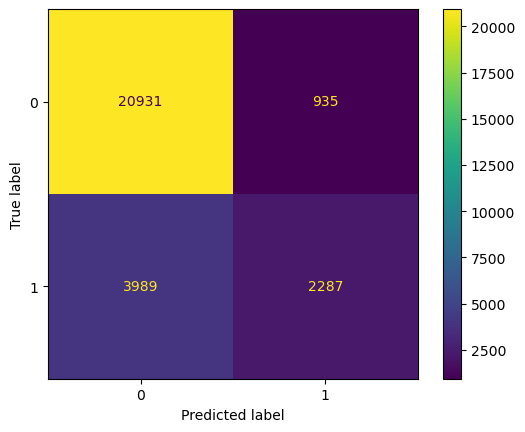

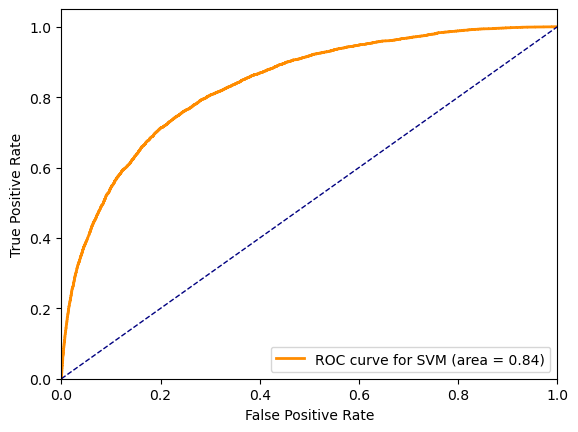

In [45]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for SVM (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [128]:
param_grid = {'C': [0.01,0.1, 1, 10,100], 'gamma': ['scale','auto'],'kernel': ['linear','rbf','sigmoid']}
tree = SVC(probability = True)
half_Grid = HalvingGridSearchCV(tree,param_grid,cv =3, n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HalvingGridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
                    param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                'gamma': ['scale', 'auto'],
                                'kernel': ['linear', 'rbf', 'sigmoid']})

In [ ]:
print("Half Grid Best Param: ", half_Grid.best_params_)
print("Half Grid Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)
print("Best Model's Train Score:", train_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)

Half Grid Best Param:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Half Grid Best Score: 0.8426963196953042


In [ ]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state = 1, max_iter=300)
clf.fit(X_train_scaled,y_train)
predict = clf.predict(X_test_scaled)



C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:

train_score = clf.score(X_train_scaled,y_train)*100
test_score = clf.score(X_test_scaled,y_test)*100
predict = clf.predict(X_test_scaled)
print("MLP Classifier Train Score:", train_score)
print("MLP Classifier Test Score:", test_score)
MLP_accuracy = accuracy_score(y_test,predict)*100
print("MLP Accuracy:", MLP_accuracy)

MLP Classifier Train Score: 84.78760708420259
MLP Classifier Test Score: 82.98273043849052
MLP Accuracy: 82.98273043849052


Classification report:                precision    recall  f1-score   support

          No       0.85      0.94      0.90     21866
         Yes       0.68      0.44      0.54      6276

    accuracy                           0.83     28142
   macro avg       0.77      0.69      0.72     28142
weighted avg       0.82      0.83      0.82     28142



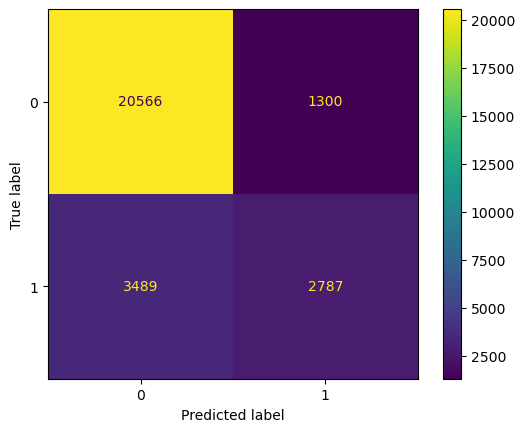

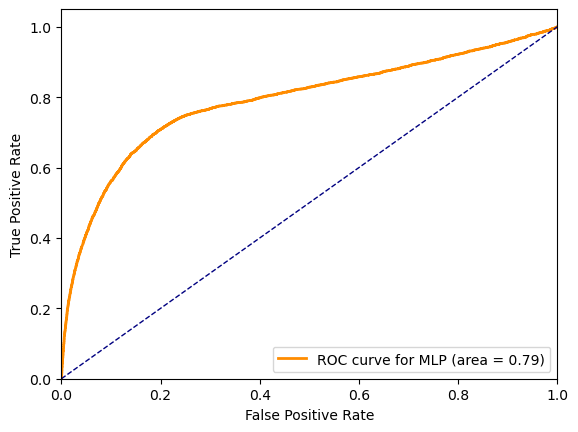

In [61]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for MLP (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [126]:
from sklearn.feature_selection import RFE
clf = MLPClassifier(random_state = 1, max_iter=300)
param_grid = {
    'hidden_layer_sizes': [(100,50), (100,200), (200,100),(200,200),(100,100)],
    'alpha': [0.0001,0.001],
    'learning_rate_init': [0.1,1]
}
# # param_grid = {
#     'hidden_layer_sizes': [(100,50), (100,200), (200,100),(200,200),(100,100)],
#     'alpha': [0.0001,0.001],
#     'learning_rate_init': [0.01,0.1]
# MLP Best Param:  {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.1}
# MLP Best Score: 0.8386097301136364
# Best Model's Train Score: 82.33601023381422
# Best Model's Test Score: 82.33601023381422
# MLP Best model Accuracy: 82.33601023381422
half_Grid = HalvingGridSearchCV(clf,param_grid,n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [73]:
print("MLP Best Param: ", half_Grid.best_params_)
print("MLP Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)*100
test_score = best_model.score(X_test_scaled, y_test)*100
print("Best Model's Train Score:", test_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predict)*100
print("MLP Best model Accuracy:",accuracy)

MLP Best Param:  {'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}
MLP Best Score: 0.8377752130681818
Best Model's Train Score: 81.19536635633573
Best Model's Test Score: 81.19536635633573
MLP Best model Accuracy: 81.19536635633573


Classification report:                precision    recall  f1-score   support

          No       0.86      0.90      0.88     21866
         Yes       0.59      0.50      0.54      6276

    accuracy                           0.81     28142
   macro avg       0.73      0.70      0.71     28142
weighted avg       0.80      0.81      0.81     28142



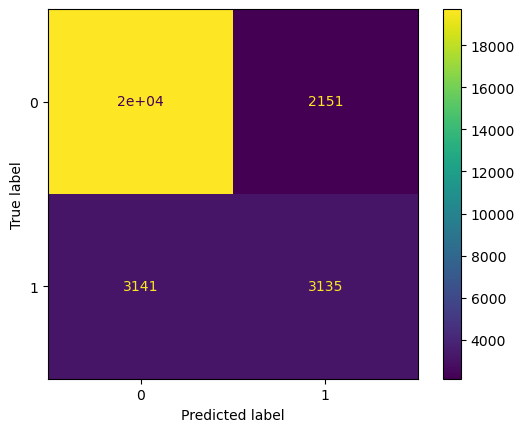

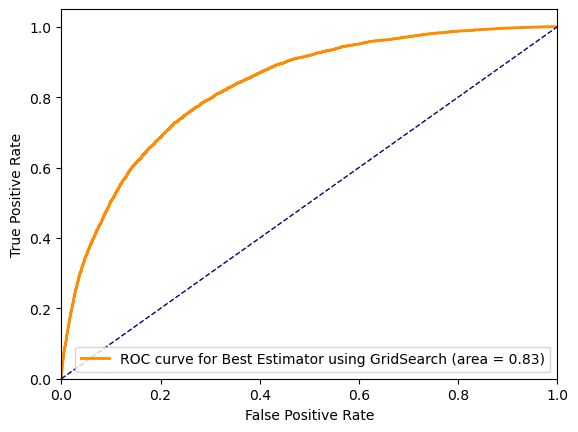

In [74]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [75]:
#Naive Bayes 
clf = GaussianNB()
clf.fit(X_train_scaled,y_train)
train_score = clf.score(X_train_scaled,y_train)
test_score = clf.score(X_test_scaled,y_test)
predict = clf.predict(X_test_scaled)
print("Gaussian NB Train score: ", train_score)
print("Gaussian NB Test score: ", test_score)

## Your code ends here

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gaussian NB Train score:  0.8111145634515513
Gaussian NB Test score:  0.8025371331106531


Classification report:                precision    recall  f1-score   support

          No       0.85      0.91      0.88     21866
         Yes       0.57      0.44      0.50      6276

    accuracy                           0.80     28142
   macro avg       0.71      0.67      0.69     28142
weighted avg       0.79      0.80      0.79     28142



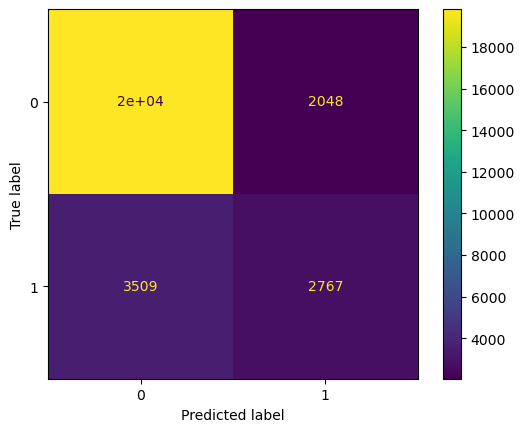

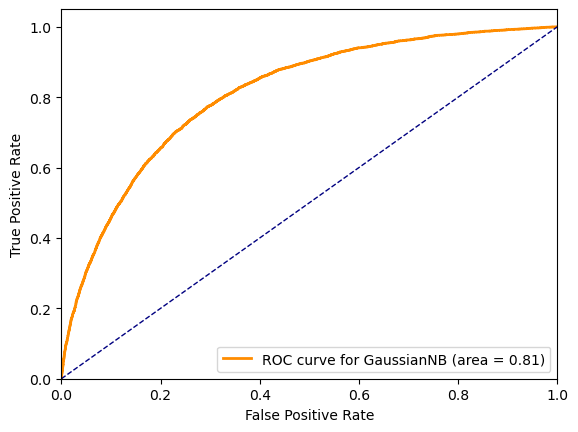

In [76]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for GaussianNB (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [77]:
param_grid = {
    'var_smoothing': [0.000001,0.0000001,0.00000001,0.000000001]
}
clf = GaussianNB()
half_Grid = HalvingGridSearchCV(clf,param_grid,n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)


C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HalvingGridSearchCV(estimator=GaussianNB(), n_jobs=-1,
                    param_grid={'var_smoothing': [1e-06, 1e-07, 1e-08, 1e-09]})

In [78]:
print("GaussianNB Best Param: ", half_Grid.best_params_)
print("GaussianNB Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)*100
test_score = best_model.score(X_test_scaled, y_test)*100
print("Best Model's Train Score:", train_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predict)*100
print("Best model Accuracy:",accuracy)


GaussianNB Best Param:  {'var_smoothing': 1e-08}
GaussianNB Best Score: 0.8109108664772726
Best Model's Train Score: 80.25371331106531
Best Model's Test Score: 80.25371331106531
Best model Accuracy: 80.25371331106531


Classification report:                precision    recall  f1-score   support

          No       0.85      0.91      0.88     21866
         Yes       0.57      0.44      0.50      6276

    accuracy                           0.80     28142
   macro avg       0.71      0.67      0.69     28142
weighted avg       0.79      0.80      0.79     28142



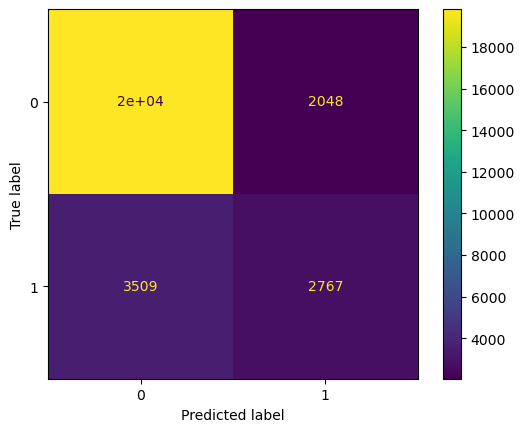

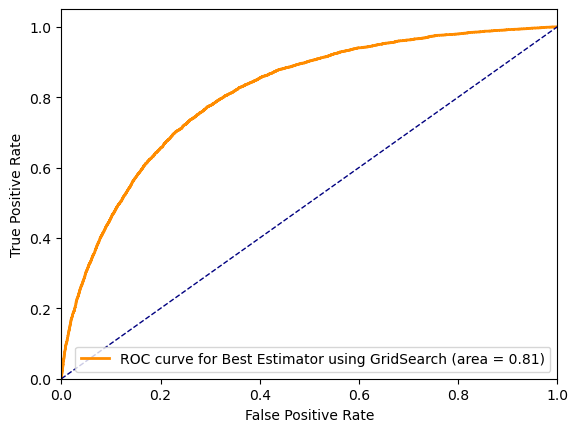

In [79]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_scaled,y_train)
predict = clf.predict(X_test_scaled)
train_score = clf.score(X_train_scaled,y_train)*100
test_score = clf.score(X_test_scaled,y_test)*100
predict = clf.predict(X_test_scaled)
print("RandomForest Classifier Train Score:", train_score)
print("RandomForest Classifier Test Score:", test_score)
accuracy = accuracy_score(y_test,predict)*100
print("RandomForest Classifier Accuracy:", accuracy)


C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest Classifier Train Score: 99.94762306360691
RandomForest Classifier Test Score: 82.75175893682041
RandomForest Classifier Accuracy: 82.75175893682041


Classification report:                precision    recall  f1-score   support

          No       0.86      0.94      0.89     21866
         Yes       0.67      0.45      0.54      6276

    accuracy                           0.83     28142
   macro avg       0.76      0.69      0.71     28142
weighted avg       0.81      0.83      0.81     28142



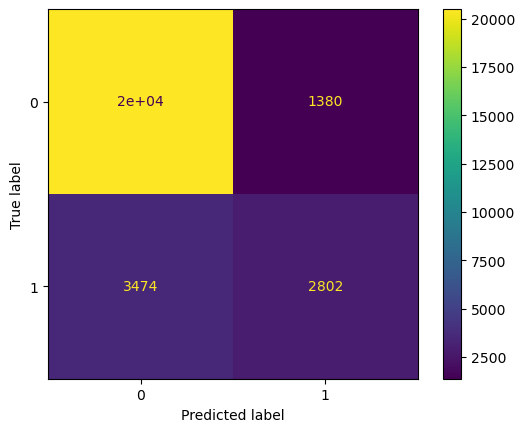

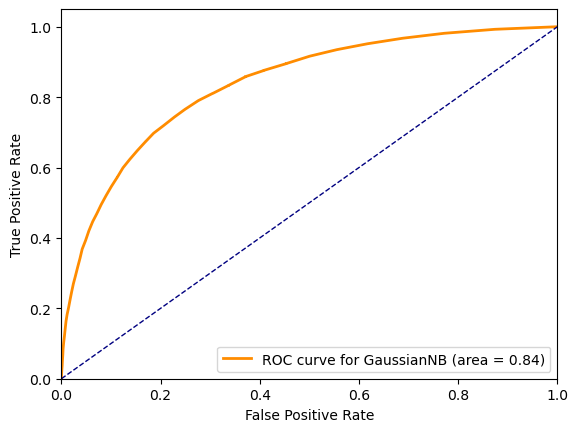

In [82]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for GaussianNB (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [123]:
param_grid = {
    'max_depth': [3,5,10,None],
    'n_estimators' : [10,50,100,200],
    'min_samples_split': [5,10,20,30],
    'max_features':['sqrt','log2']
}
clf = RandomForestClassifier()
half_Grid = HalvingGridSearchCV(clf,param_grid,n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'max_depth': [3, 5, 10, None],
                                'max_features': ['sqrt', 'log2'],
                                'min_samples_split': [5, 10, 20, 30],
                                'n_estimators': [10, 50, 100, 200]})

In [124]:
print("RandomForest Best Param: ", half_Grid.best_params_)
print("RandomForest Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)*100
test_score = best_model.score(X_test_scaled, y_test)*100
print("Best Model's Train Score:", train_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predict)*100
print("Best model Accuracy:",accuracy)

RandomForest Best Param:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 100}
RandomForest Best Score: 0.8421085353939072
Best Model's Train Score: 92.28727417994584
Best Model's Test Score: 83.11775993177457
Best model Accuracy: 83.11775993177457


Classification report:                precision    recall  f1-score   support

          No       0.86      0.94      0.90     21866
         Yes       0.68      0.46      0.55      6276

    accuracy                           0.83     28142
   macro avg       0.77      0.70      0.72     28142
weighted avg       0.82      0.83      0.82     28142



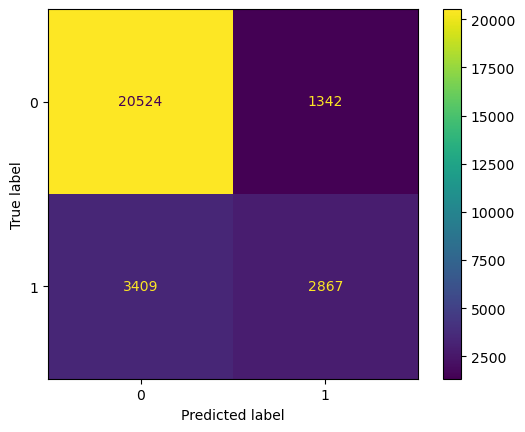

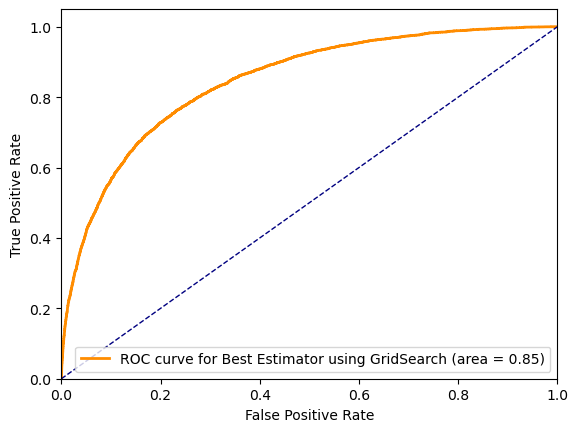

In [125]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [93]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
clf.fit(X_train_scaled,y_train)

train_score = clf.score(X_train_scaled,y_train)*100
test_score = clf.score(X_test_scaled,y_test)*100
predict = clf.predict(X_test_scaled)
print("LogisticRegression Train Score:", train_score)
print("LogisticRegression Test Score:", test_score)
accuracy = accuracy_score(y_test,predict)*100
print("LogisticRegression Accuracy:", accuracy)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression Train Score: 83.5509787385148
LogisticRegression Test Score: 82.7410987136664
LogisticRegression Accuracy: 82.7410987136664


Classification report:                precision    recall  f1-score   support

          No       0.85      0.94      0.89     21866
         Yes       0.69      0.42      0.52      6276

    accuracy                           0.83     28142
   macro avg       0.77      0.68      0.71     28142
weighted avg       0.81      0.83      0.81     28142



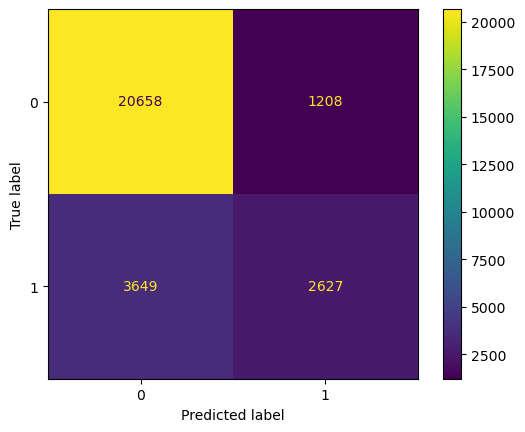

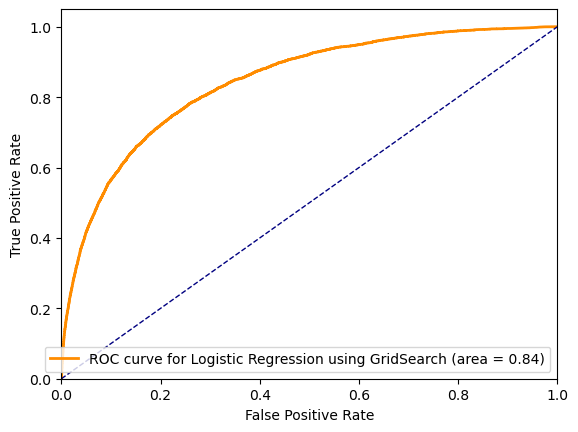

In [94]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Logistic Regression using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [107]:
param_grid = {
    'Cs': [0.001,0.01,0.1,1,3,10,100],
    'penalty': ['l1','l2'],
    'max_iter': [100,200,285,300]
}
clf = LogisticRegressionCV()
half_Grid = HalvingGridSearchCV(clf,param_grid,n_jobs=-1)
half_Grid.fit(X_train_scaled, y_train)

C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\15623\anaconda3\envs\cecs456\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  F

HalvingGridSearchCV(estimator=LogisticRegressionCV(), n_jobs=-1,
                    param_grid={'Cs': [0.001, 0.01, 0.1, 1, 3, 10, 100],
                                'max_iter': [100, 200, 285, 300],
                                'penalty': ['l1', 'l2']})

In [108]:
print("Logistic Regression Best Param: ", half_Grid.best_params_)
print("Logistic Regressio  Best Score:", half_Grid.best_score_)

best_model = half_Grid.best_estimator_
train_score = best_model.score(X_train_scaled, y_train)*100
test_score = best_model.score(X_test_scaled, y_test)*100
print("Best Model's Train Score:", train_score)
print("Best Model's Test Score:", test_score)
predict = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predict)*100
print("Best model Accuracy:",accuracy)

Logistic Regression Best Param:  {'Cs': 10, 'max_iter': 285, 'penalty': 'l2'}
Logistic Regressio  Best Score: 0.8354580965909092
Best Model's Train Score: 83.5509787385148
Best Model's Test Score: 82.7410987136664
Best model Accuracy: 82.7410987136664


Classification report:                precision    recall  f1-score   support

          No       0.85      0.94      0.89     21866
         Yes       0.69      0.42      0.52      6276

    accuracy                           0.83     28142
   macro avg       0.77      0.68      0.71     28142
weighted avg       0.81      0.83      0.81     28142



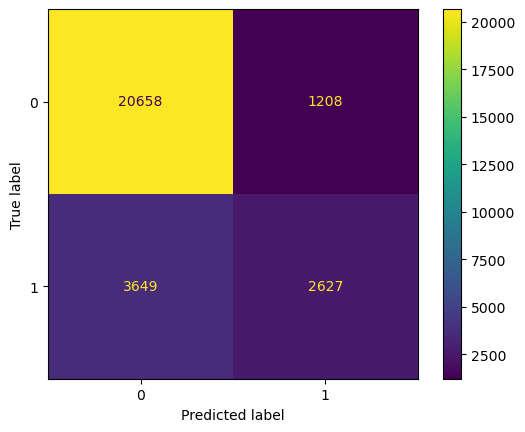

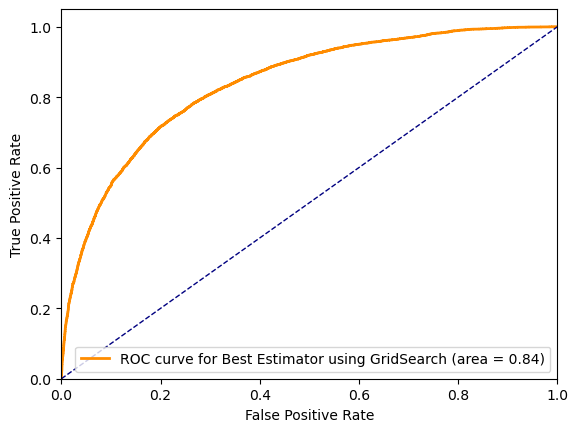

In [109]:
#evaluate the predict we got from best model
print("Classification report: ", classification_report(y_test,predict))
cm = metrics.confusion_matrix(y_test,predict)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

display.plot()
plt.show()

y_score = best_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label="Yes")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve for Best Estimator using GridSearch (area = %0.2f)' %(roc_auc))

plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()